# Week 11 - Introduction to Modeling, part 2

# 1. Lesson - No lesson this week

# 2. Weekly graph question

In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

The book names one of Vonnegut's rules as "keep it simple" and another as "have the guts to cut."  Here is some data from the previous week's lesson.  If you had to cut one of the two plots below, which would it be?  Which seems more interesting or important?  Explain.  (Should "amount of training data used" or "number of estimators" be on the x-axis.)

####  Every thing is dependent on what the story is assuming no toher context/background is given I will pick Image/graph for the datasize v/s  loss function - picture 1.

- Assuming the story is targeted for management - Based on what Kurt Vonnegut mentioned with keep it simple and have the guts to cut I will graph 1.  The graph of loss function data size is showing us rate of learning on size of training data. Thats very important as we want something to train quickly and also if we know how much data is good enough to get to reasonable accuracy(loss function) we can save time and money. This is something the organization will care as well as it will  save money in pre-processing data which is one of the most labor intensive and expensive part of the data science process.

- If the story is to analyze performance of the model and hyperparameter tuning - Then I will pick the 2nd graph as it showing us how no of estimators is influencing the loss function. This is important as we want to know how many trees we need to get to a reasonable accuracy. This is could be important for the data science team /engineers.

#### The loss function is a dependent variable(ie outcome of the process so it should be in y axis. The one we can control should be on X axis (here it is the data size)

In [14]:
np.random.seed(0)
num_points = 10000
feature_1a = np.random.random(size = num_points) * 3
feature_2a = np.random.random(size = num_points) * 3
feature_3a = np.random.random(size = num_points) * 3
train_target = (feature_1a - 2 * feature_2a) * feature_3a + np.random.normal(size = num_points)
feature_1b = np.random.random(size = num_points) * 3
feature_2b = np.random.random(size = num_points) * 3
feature_3b = np.random.random(size = num_points) * 3
test_target = (feature_1b - 2 * feature_2b) * feature_3b + np.random.normal(size = num_points)
train_df = pd.DataFrame({"f1": feature_1a, "f2": feature_2a, "f3": feature_3a})
test_df = pd.DataFrame({"f1": feature_1b, "f2": feature_2b, "f3": feature_3b})
rf = RandomForestRegressor()
rf.fit(train_df.values, train_target)

RandomForestRegressor()

In [15]:
rmse_lst = list()
rf = RandomForestRegressor()
for x in range(round(num_points / 20), num_points, round(num_points / 20)):
    rf.fit(train_df.values[0:x,:], train_target[0:x])
    rmse_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss function')

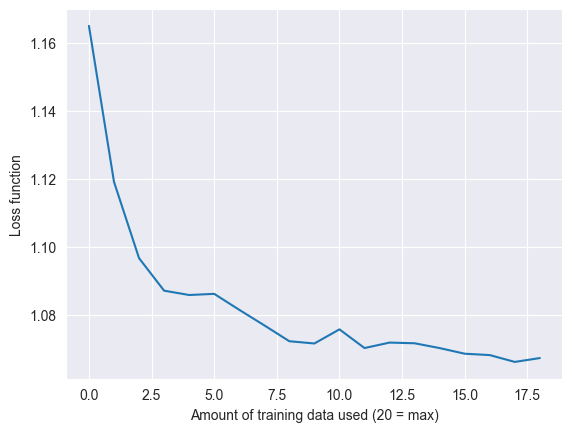

In [16]:
plt.plot(rmse_lst)
plt.xlabel("Amount of training data used (20 = max)")
plt.ylabel("Loss function")

In [17]:
num_trees_lst = list()
for n_estimators in range(1, 100, 3):
    rf = RandomForestRegressor(n_estimators = n_estimators)
    rf.fit(train_df.values, train_target)
    num_trees_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

Text(0, 0.5, 'Loss function')

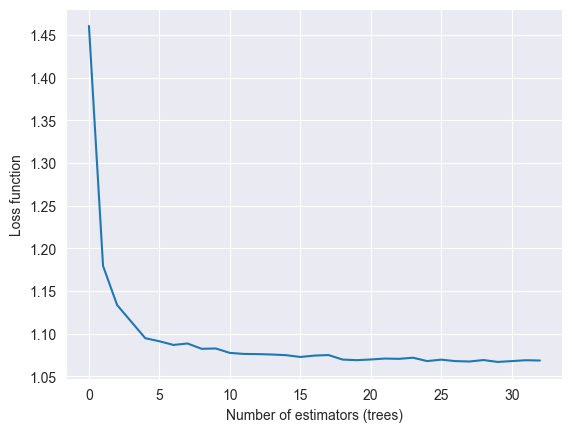

In [18]:
plt.plot(num_trees_lst)
plt.xlabel("Number of estimators (trees)")
plt.ylabel("Loss function")

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:

* Implement a random forest model.
* Perform cross-validation.
* Tune hyperparameters.
* Evaluate a performance metric.

If you like, you can try other types of models, too (beyond linear regression and random forest) although you will have many opportunities to do that next semester.

### In this file let me import my previously preprocessed notebook with Phishing website

In [19]:
%run "OMDS-MODB2-Week6-Halder-Deb_phishing_web_page_mod_b2.ipynb"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

### Using phishing webpage dataset- Dataset 2, dataset given as a part of the mod2 capstone project

- a. Random forest model

- b. perform cross validation

- c. Tune hyper parameters

- Evaluate a performance metric

In [20]:
week11_phishing_website_df = df_phishing_web_cleaned.copy()
week11_phishing_website_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 82 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   length_url                  10000 non-null  int64  
 1   length_hostname             10000 non-null  int64  
 2   ip                          10000 non-null  int64  
 3   nb_dots                     10000 non-null  int64  
 4   nb_hyphens                  10000 non-null  int64  
 5   nb_at                       10000 non-null  int64  
 6   nb_qm                       10000 non-null  int64  
 7   nb_and                      10000 non-null  int64  
 8   nb_eq                       10000 non-null  int64  
 9   nb_underscore               10000 non-null  int64  
 10  nb_tilde                    10000 non-null  int64  
 11  nb_percent                  10000 non-null  int64  
 12  nb_slash                    10000 non-null  int64  
 13  nb_star                     1000

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy import stats
#adding the below import so we can calculate the mean squared error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, f1_score, precision_score, recall_score, classification_report, confusion_matrix


np.random.seed(0)
#let me get the target value from main dataset

week11_phishing_website_df = week11_phishing_website_df.sample(frac=1, random_state=23).reset_index(drop=True)
y = week11_phishing_website_df['status']
X = week11_phishing_website_df.drop(columns=['status'])

# let me standardize the data using standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# test setup and config
result_df = pd.DataFrame()
random_value = [19,21,23,99]  # random value to be used for r different test to do an average at the end
no_of_iter = 10 # number iof iterations to run the test

for random_int in random_value:
	rsCV = RandomizedSearchCV(estimator = RandomForestRegressor(random_state=random_int), param_distributions = {"n_estimators": [2, 4, 16, 32,64, 90,132], "max_depth": [2, 4, 10,20, 30,50, 60 ,None]}, scoring = "neg_mean_squared_error", cv=5, n_iter=no_of_iter, random_state=random_int)
	X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
	rsCV.fit(X_train, y_train)
	y_pred_best = rsCV.best_estimator_.predict(X_test)
	#since the data is binary so lets round it
	y_pred_best = np.round(y_pred_best)
	corr , p_value = stats.pearsonr(y_test, y_pred_best)
    # add to  a dataframe result_df and have columns alpha, corr, p_value best_estimator, best_params, best_score, f1score, precision and recall
	row_data= pd.DataFrame({ "corr" : [corr], "p_value" : [p_value], "best_estimator":[str(rsCV.best_estimator_)], "best_params":[str(rsCV.best_params_)], "best_score":[str(rsCV.best_score_)] ,"rmse": [mean_squared_error(y_test, y_pred_best)],"f1_score": [f1_score(y_test, y_pred_best)],
        "precision": [precision_score(y_test, y_pred_best)],
        "recall": [recall_score(y_test, y_pred_best)]})
	result_df = pd.concat([result_df,row_data], ignore_index=True)
sorted_df_neg_mean_squared = result_df.sort_values(by='corr', ascending=False)
print(sorted_df_neg_mean_squared)

       corr  p_value                                     best_estimator  \
1  0.900257      0.0  RandomForestRegressor(max_depth=60, n_estimato...   
3  0.898256      0.0  RandomForestRegressor(max_depth=50, n_estimato...   
2  0.896256      0.0  RandomForestRegressor(n_estimators=90, random_...   
0  0.896215      0.0  RandomForestRegressor(max_depth=50, n_estimato...   

                               best_params            best_score   rmse  \
1    {'n_estimators': 90, 'max_depth': 60}  -0.03418989197530864  0.050   
3   {'n_estimators': 132, 'max_depth': 50}  -0.03408894341138659  0.051   
2  {'n_estimators': 90, 'max_depth': None}  -0.03394276234567901  0.052   
0   {'n_estimators': 132, 'max_depth': 50}  -0.03412393824609734  0.052   

   f1_score  precision    recall  
1  0.950642   0.939512  0.962038  
3  0.949654   0.938537  0.961039  
2  0.948667   0.937561  0.960040  
0  0.948617   0.938416  0.959041  


### Overall Analysis

- a. Model- Random forest model , using RandomizedSearchCV

- b. perform cross validation  : The code above did CV = 5 and n_iter = 50 so it did 5 fold cross validation and 10 iterations to arrive at the results and best hyper parameters

- c. Tune hyper parameters : Best Hyper parameter observed: {'n_estimators': 90, 'max_depth': 60}

- Evaluate a performance metric : The best metric I can use is f1 score, precision and recall : 0.951, 0.939 & 0.962 respectively . This data is working very nicely with this  model. the rems error on both on the predicted target and the test is very similar and yet very . Since the model performance and scores are not changing even we shuffle the data or with various random seed used so the model is very stable



#### My expectation from a good phishing website identifier model vs result achieved

- Correlation above 0.6  / Achieved 0.83 with training set split of 0.5

- p_value as low as possible nearer to zero as that would mean statistically significant correlation without the chance of it being a fluke / Achieved very low ( 1.8 e to power -65) and near zero. This is very small and considered a goo data

- Mean Squared Error (MSE) as low as possible (best_score) / achieved 0.0715

- rmse(for test data)- Square of this value as near to MSE as possible / 0.084

- f1 Score - Reliability of the model in the range of .7 to 0.9 / Achieved 0.914

- precision - Any website that were classified as phishing were actually phishing (preferred above above 0.8) / Achieved 0.925

- recall - How many of the actual web site urls which were phishing can this model identity (should be above 0.8) / Achieved 0.903



# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter seven (p. 165-185) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.

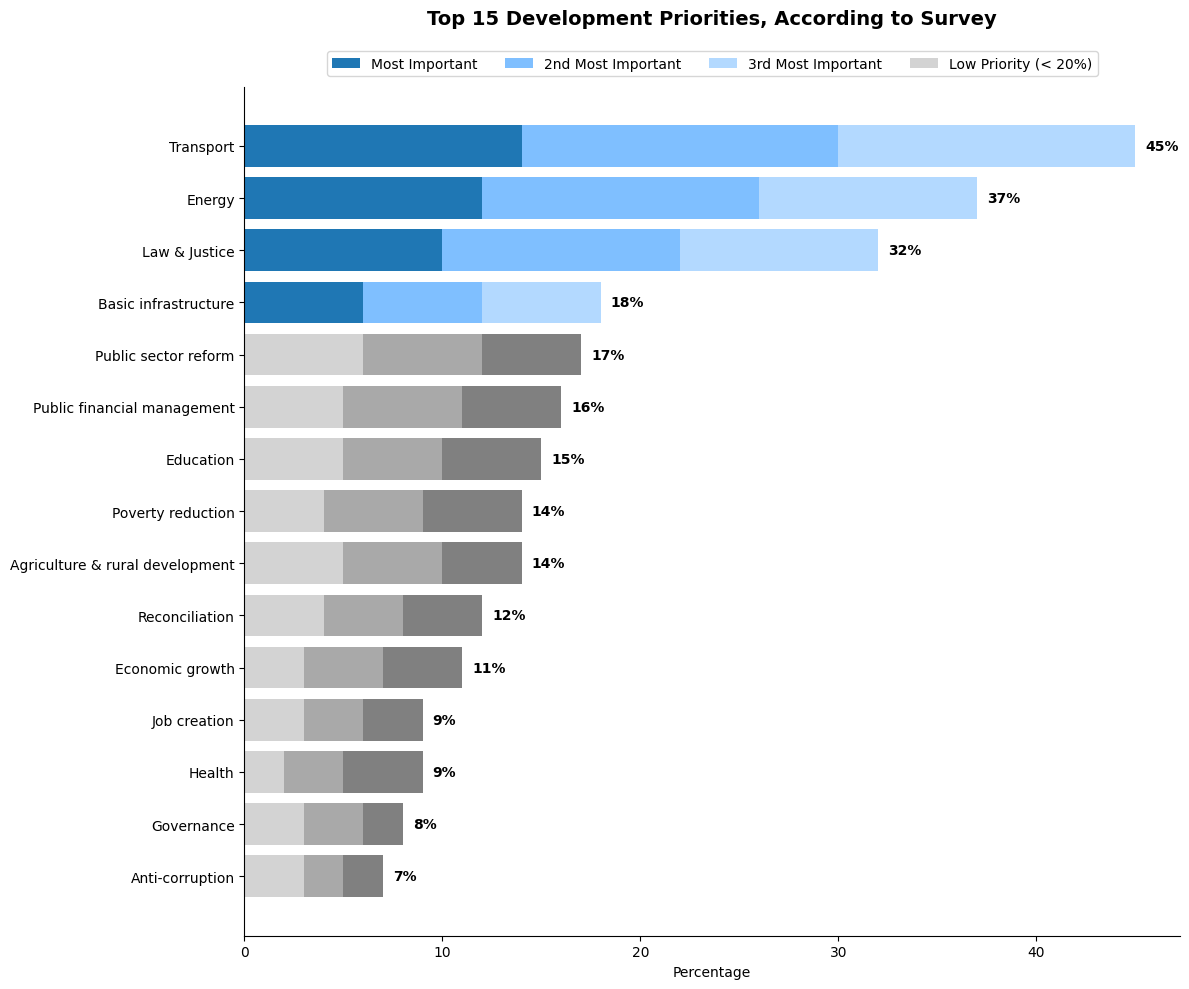

In [51]:
#I didnt find any graphs in the page range given in this homework , so picking up another new graph which I have not done before but within this page range

import matplotlib.pyplot as plt


# dev priorities identified

dev_priorities_labels = [
    'Anti-corruption', 'Governance', 'Job creation', 'Health', 'Economic growth',
    'Reconciliation', 'Poverty reduction', 'Agriculture & rural development',
    'Education', 'Public financial management', 'Public sector reform',
    'Basic infrastructure', 'Law & Justice', 'Energy', 'Transport'
]


light_blue  = '#1f77b4'
medium_blue = '#7fbfff'
darker_blue = '#b3d9ff'

# let me create data for survey plot
survey_most_important_counts = [3, 3, 3, 2, 3, 4, 4, 5, 5, 5, 6, 6, 10, 12, 14]
survey_second_important_counts = [2, 3, 3, 3, 4, 4, 5, 5, 5, 6, 6, 6, 12, 14, 16]
survey_third_important_counts = [2, 2, 3, 4, 4, 4, 5, 4, 5, 5, 5, 6, 10, 11, 15]

total_percentages = [sum(x) for x in zip(survey_most_important_counts, survey_second_important_counts, survey_third_important_counts)]


sorted_data = sorted(
    zip(dev_priorities_labels, total_percentages, survey_most_important_counts, survey_second_important_counts, survey_third_important_counts),
    key=lambda x: x[1],
    reverse=True
)


dev_priorities_sorted, total_percentages_sorted, most_important_sorted, second_important_sorted, third_important_sorted = zip(*sorted_data)


myfig= plt.figure(figsize=(12, 10))


#let me create this method as I may have to call it multiple times and dont want to commit mistake
def get_value_based_color(total_per, threshold=20 ):
	light_blue  = '#1f77b4'
	medium_blue = '#7fbfff'
	darker_blue = '#b3d9ff'
	if total_per < threshold:
		return ['lightgrey', 'darkgrey', 'grey']
	else:
		return [light_blue, medium_blue, darker_blue]

#let me reverse the order in which the graph will show so highest is on top
for i, (priority, total, most, second, third) in enumerate(zip(
    reversed(dev_priorities_sorted),
    reversed(total_percentages_sorted),
    reversed(most_important_sorted),
    reversed(second_important_sorted),
    reversed(third_important_sorted)
)):
    colors = get_value_based_color(total, 18)

    plt.barh(i, most, color=colors[0], left=0)
    plt.barh(i, second, color=colors[1], left=most)
    plt.barh(i, third, color=colors[2], left=most+second)


    plt.text(total + 0.5, i, f'{total}%', va='center', fontweight='bold')

# set label and title
plt.xlabel('Percentage')
plt.title('Top 15 Development Priorities, According to Survey', fontsize=14, fontweight='bold', pad=45)


plt.yticks(range(len(dev_priorities_sorted)), list(reversed(dev_priorities_sorted)))

# create legend (https://labex.io/tutorials/matplotlib-composing-custom-legends-48641)
from matplotlib.patches import Patch

# use patch to create individual rectangular patch
# got help from chatgpt on "how to use legend patch" , matplotlib site was unclear

legend_elements = [
    Patch(facecolor= light_blue, label='Most Important'),
    Patch(facecolor= medium_blue, label='2nd Most Important'),
    Patch(facecolor= darker_blue, label='3rd Most Important'),
    Patch(facecolor='lightgrey', label='Low Priority (< 20%)')
]

#google search showed Moving Legend Outside the Plot: Use bbox_to_anchor and loc parameters

plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4) # center aligned and 4 legend so fo col
plt.tight_layout()


plt.gca().spines['right'].set_visible(False)  # remove spines for less clutter
plt.gca().spines['top'].set_visible(False)

plt.show()